## Step 1: Library Imports

Run this cell to import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

import cptac
import cptac.algorithms as al

## Step 2: Find the frequently mutated genes for Endometrial Cancer

Enter the type of cancer and the cutoff for mutation frequency that you would like to use.

In [2]:
cancer_object = cptac.Endometrial()
desired_cutoff = .15

endometrial_freq_mut = al.get_frequently_mutated(cancer_object, cutoff=desired_cutoff)
print(endometrial_freq_mut)

CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but analysis may not be
published until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter cptac.embargo() to open the webpage for more details.
       Gene  Unique_Samples_Mut  Missence_Mut  Truncation_Mut
0     AHNAK            0.157895      0.126316        0.042105
1    ARID1A            0.452632      0.136842        0.400000
2   CCDC168            0.168421      0.115789        0.115789
3      CTCF            0.284211      0.094737        0.242105
4    CTNNB1            0.305263      0.305263        0.000000
5    DNAH17            0.157895      0.136842        0.031579
6     DOCK3            0.200000      0.115789        0.157895
7     FBXW7            0.189474      0.157895        0.042105
8     HERC2            0.178947      0.157895        0.063158
9     HUWE1  

## Step 3: Select a gene from the list of frequently mutated genes above

Set the gene to which of the above frequently mutated genes you want to examine. For example, if you want to look at the gene PTEN, change the cell below to say "gene = 'ARID1A'"

In [3]:
gene = 'ARID1A'

## Step 4: Select desired omics comparison

Select which type of omics you want to compare. If you want to compare proteomics data for the interacting proteins, uncomment the "omics = en.get_proteomics()" line, etc.

In [4]:
omics = cancer_object.get_proteomics()
#omics = cancer_object.get_transcriptomics()
#omics = cancer_object.get_phosphoproteomics()
#omics = cancer_object.get_acetylproteomics()

## Step 5: cis comparison 

Determine if the DNA mutation has an effect on the omics measurement. In order to do this, we have a few steps in code.
1. get a table with both the omics and mutation data for tumors
2. get a binary column from the mutation data to separate our samples
3. format data frame to be used in the T-test
4. send data to the T-test.
5. visualize comparison

Doing t-test comparison

          Comparison       P_Value
0  ARID1A_proteomics  1.025018e-10


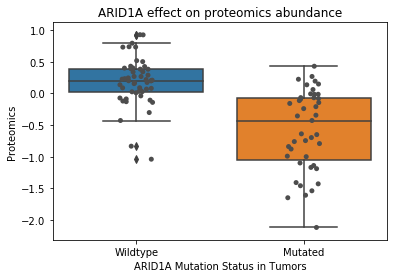

In [10]:
# Step 1 - Create dataframe in order to do comparisons with wrap_ttest - drop nan values?
omics_and_mutations = cancer_object.append_mutations_to_omics(
    mutation_genes = gene, omics_df_name = omics.name, omics_genes = gene).dropna()

# Check if values in omics data
if omics_and_mutations[gene+"_"+omics.name].empty:
    print('Not possible to do T-test.')

else:
    # Step 2 - Create the binary column needed to do the comparison
    omics_and_mutations['binary_mutations'] = np.where(
        omics_and_mutations[gene+'_Mutation_Status'] == 'Wildtype_Tumor', 'Wildtype', 'Mutated')

    # Step 3 - Format the dataframe correctly for the T-test(just omics and binary columns for tumors)
    tumors = omics_and_mutations.loc[omics_and_mutations['Sample_Status'] == 'Tumor']
    columns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]
    omics_binary_mutations = tumors.drop(columns_to_drop, axis = 1)

    # Make a list of the column label of omics to be used in the wrap_ttest function
    omics_col_list = [omics_binary_mutations.columns[0]] 

    # Step 4 - T-test comparing means of mutated vs wildtype effect on cis omics
    print("Doing t-test comparison\n")
    significant_pval_results = al.wrap_ttest(omics_binary_mutations, 'binary_mutations', omics_col_list)
    if not significant_pval_results.empty:
        print(significant_pval_results)
    
    # Step 5 - Visualize comparison
    endo_cis_boxplot = sns.boxplot(data = omics_binary_mutations, x = "binary_mutations",
                              y = gene+"_proteomics", order = ["Wildtype","Mutated"])  
    endo_cis_boxplot.set_title(gene + " effect on " + omics.name + " abundance")
    endo_cis_boxplot = sns.stripplot(data=omics_binary_mutations, x = "binary_mutations",
                                y = gene+"_proteomics",jitter = True, color = ".3", order = ["Wildtype","Mutated"])
    endo_cis_boxplot.set(xlabel = gene + " Mutation Status in Tumors", ylabel = "Proteomics")
    plt.show()



# Repeat with the Colon dataset

In [6]:
colon_object = cptac.Colon()
desired_cutoff = .15

colon_freq_mut = al.get_frequently_mutated(colon_object, cutoff=desired_cutoff)

Find the common frequently mutated genes between Endometrial and Colon datasets.

In [7]:
endometrial_genes = endometrial_freq_mut['Gene']
colon_genes = colon_freq_mut['Gene']
common_genes = pd.merge(endometrial_genes,colon_genes, how='inner')
common_genes

,Gene
0,ARID1A
1,CCDC168
2,DOCK3
3,FBXW7
4,HERC2
5,KMT2B
6,KMT2D
7,KRAS
8,MUC16
9,OBSCN


In [8]:
gene = 'ARID1A'

omics = colon_object.get_proteomics()
#omics = colon_object.get_transcriptomics()
#omics = colon_object.get_phosphoproteomics()
#omics = colon_object.get_acetylproteomics()

Doing t-test comparison

          Comparison   P_Value
0  ARID1A_proteomics  0.001305


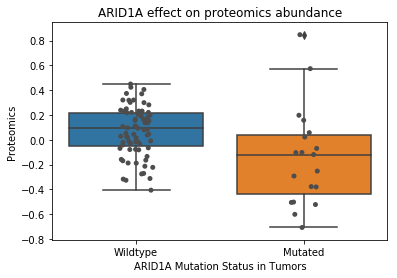

In [9]:
# Step 1 - Create dataframe in order to do comparisons with wrap_ttest - drop nan values?
omics_and_mutations = colon_object.append_mutations_to_omics(
    mutation_genes = gene, omics_df_name = omics.name, omics_genes = gene).dropna()

# Check if values in omics data
if omics_and_mutations[gene+"_"+omics.name].empty:
    print('Not possible to do T-test.')

else:
    # Step 2 - Create the binary column needed to do the comparison
    omics_and_mutations['binary_mutations'] = np.where(
        omics_and_mutations[gene+'_Mutation_Status'] == 'Wildtype_Tumor', 'Wildtype', 'Mutated')

    # Step 3 - Format the dataframe correctly for the T-test(just omics and binary columns for tumors)
    tumors = omics_and_mutations.loc[omics_and_mutations['Sample_Status'] == 'Tumor']
    columns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]
    omics_binary_mutations = tumors.drop(columns_to_drop, axis = 1)

    # Make a list of the column label of omics to be used in the wrap_ttest function
    omics_col_list = [omics_binary_mutations.columns[0]] 

    # Step 4 - T-test comparing means of mutated vs wildtype effect on cis omics
    print("Doing t-test comparison\n")
    significant_pval_results = al.wrap_ttest(omics_binary_mutations, 'binary_mutations', omics_col_list)
    if not significant_pval_results.empty:
        print(significant_pval_results)
    
    # Step 5 - Visualize comparison
    cis_boxplot = sns.boxplot(data = omics_binary_mutations, x = "binary_mutations",
                              y = gene+"_proteomics", order = ["Wildtype","Mutated"])  
    cis_boxplot.set_title(gene + " effect on " + omics.name + " abundance")
    cis_boxplot = sns.stripplot(data=omics_binary_mutations, x = "binary_mutations",
                                y = gene+"_proteomics",jitter = True, color = ".3", order = ["Wildtype","Mutated"])
    cis_boxplot.set(xlabel = gene + " Mutation Status in Tumors", ylabel = "Proteomics")
    plt.show()



Cancer comparison